In [2]:
def read_pages():
    page_data = [] # 辞書のリスト
    with open("wikipedia_links/pages.txt", "r") as f:
        for line in f:
            if line.split():
                page_data.append({ "id": int(line.split()[0]),"name": line.split()[1] })
    print(page_data[:10])
    return page_data

In [3]:
sample_data = read_pages()

[{'id': 0, 'name': 'アンパサンド'}, {'id': 1, 'name': '言語'}, {'id': 2, 'name': '日本語'}, {'id': 3, 'name': '地理学'}, {'id': 4, 'name': 'EU_(曖昧さ回避)'}, {'id': 5, 'name': '国の一覧'}, {'id': 6, 'name': 'SandBox'}, {'id': 7, 'name': 'パリ'}, {'id': 8, 'name': 'ヨーロッパ'}, {'id': 9, 'name': '生物'}]


In [19]:
len(sample_data)

1483277

In [5]:
def read_links():
    link_data = [] # 辞書のリスト
    with open("wikipedia_links/links.txt", "r") as f:
        for line in f:
            if line.split():
                link_data.append({ "from": int(line.split()[0]), "to": int(line.split()[1])})
    print(link_data[:10])
    return link_data

In [6]:
link_sample = read_links()

[{'from': 0, 'to': 284171}, {'from': 0, 'to': 955}, {'from': 0, 'to': 591}, {'from': 0, 'to': 1098}, {'from': 0, 'to': 6472}, {'from': 0, 'to': 4189}, {'from': 0, 'to': 529843}, {'from': 0, 'to': 2369}, {'from': 0, 'to': 890307}, {'from': 0, 'to': 1299}]


In [7]:
len(link_sample)

52973671

In [8]:
link_sample[:1000]

[{'from': 0, 'to': 284171},
 {'from': 0, 'to': 955},
 {'from': 0, 'to': 591},
 {'from': 0, 'to': 1098},
 {'from': 0, 'to': 6472},
 {'from': 0, 'to': 4189},
 {'from': 0, 'to': 529843},
 {'from': 0, 'to': 2369},
 {'from': 0, 'to': 890307},
 {'from': 0, 'to': 1299},
 {'from': 0, 'to': 919287},
 {'from': 0, 'to': 1301},
 {'from': 0, 'to': 11096},
 {'from': 0, 'to': 775163},
 {'from': 0, 'to': 284204},
 {'from': 0, 'to': 205695},
 {'from': 0, 'to': 478133},
 {'from': 0, 'to': 478134},
 {'from': 0, 'to': 140056},
 {'from': 0, 'to': 140057},
 {'from': 0, 'to': 581741},
 {'from': 0, 'to': 545942},
 {'from': 0, 'to': 480047},
 {'from': 0, 'to': 1186244},
 {'from': 0, 'to': 895324},
 {'from': 0, 'to': 87908},
 {'from': 0, 'to': 79585},
 {'from': 0, 'to': 10790},
 {'from': 0, 'to': 12368},
 {'from': 0, 'to': 235566},
 {'from': 0, 'to': 88113},
 {'from': 0, 'to': 799173},
 {'from': 0, 'to': 5128},
 {'from': 0, 'to': 581718},
 {'from': 0, 'to': 466621},
 {'from': 0, 'to': 895325},
 {'from': 0, 'to'

In [9]:
import networkx as nx
from IPython.display import SVG, display

In [22]:
df = pd.io.json.json_normalize(link_sample)

In [28]:
top = df['from'].value_counts().head(10)

In [32]:
top

7741      6396
82        5946
81044     5511
413576    5307
191660    4561
130994    4178
3753      4127
584052    4074
21271     4005
81045     3800
Name: from, dtype: int64

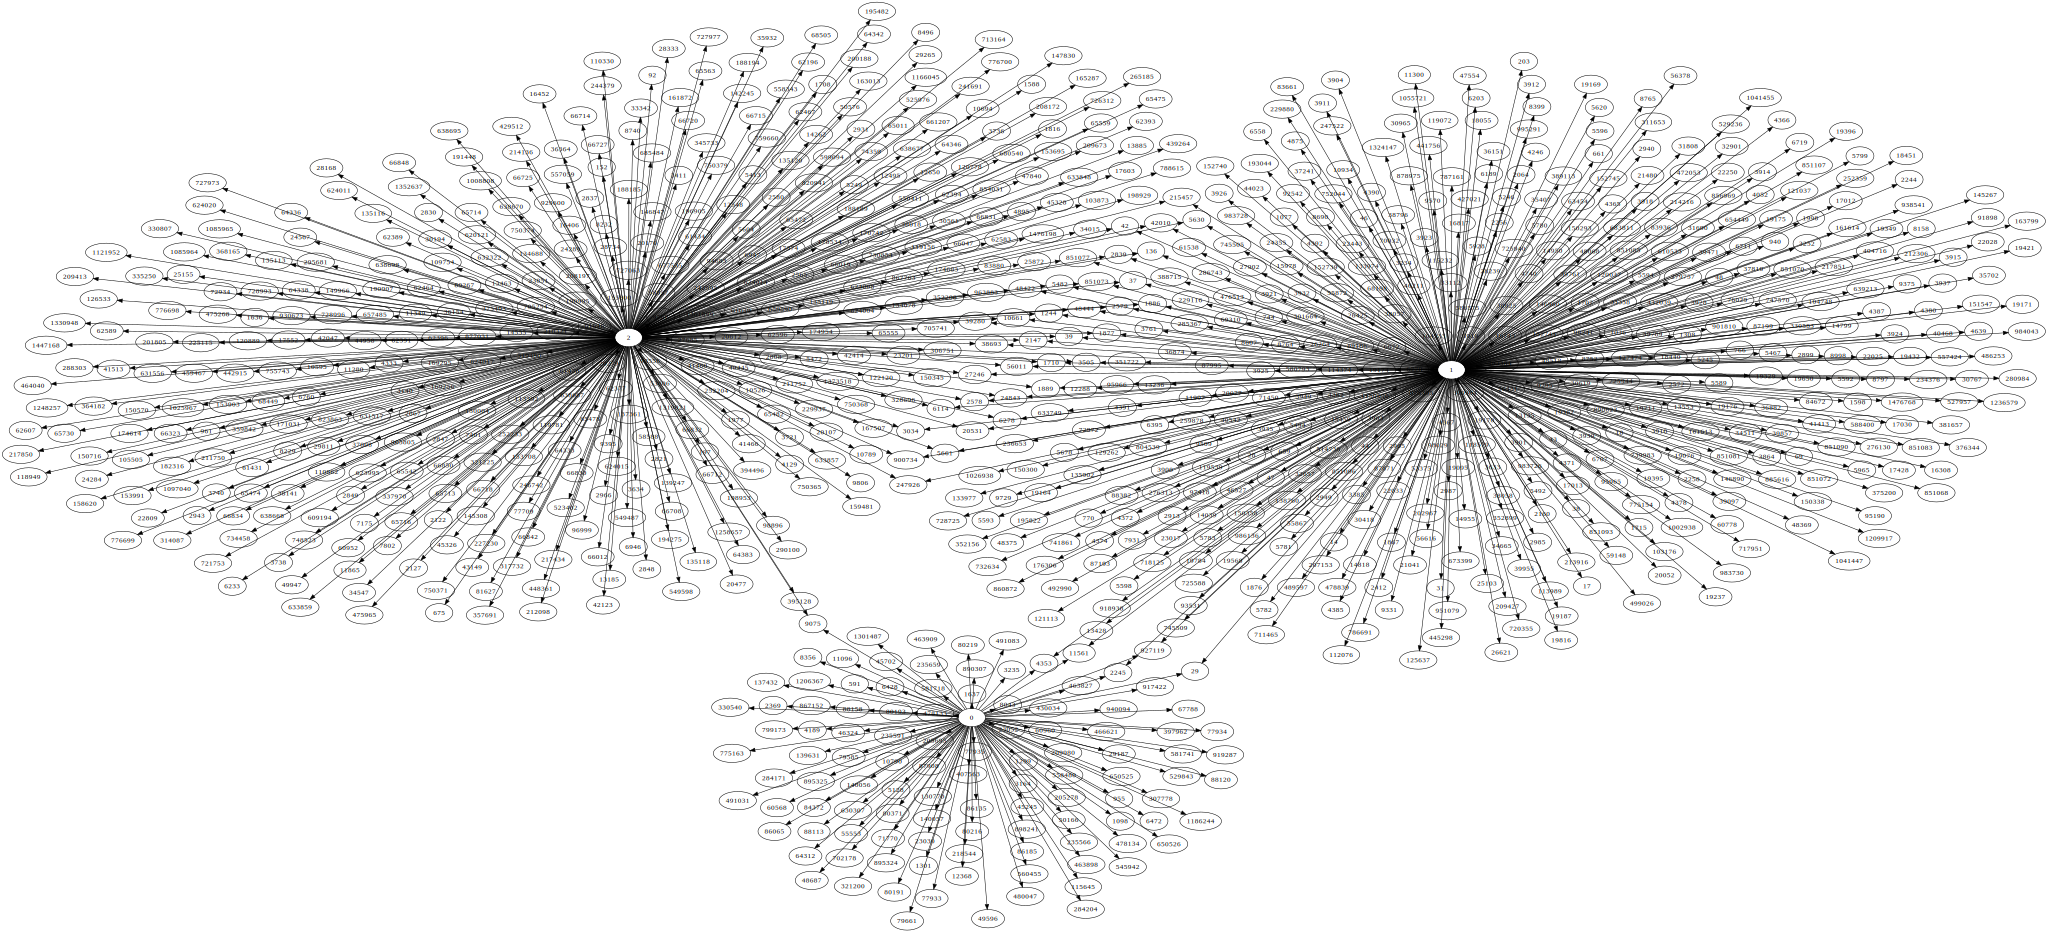

In [17]:
G = nx.DiGraph()
for data in link_sample[:1000]:
    G.add_path([data['from'], data['to']])

svg = SVG(nx.nx_agraph.to_agraph(G).draw(prog='fdp', format='svg'))
display(svg)


In [18]:
from collections import Counter
from itertools import chain, combinations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### やりたいこと
- 出現回数を数える
- 出現回数が多い/少ない名前を見つける
- グラフに表現
- 